# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import joblib
import os
import ast
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import random

import re, string
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
import nltk
from nltk.corpus import words
from langdetect import detect
nltk.download("words")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package words to /home/joeymeyer/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /home/joeymeyer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/joeymeyer/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/joeymeyer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/joeymeyer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
#sonia's machine
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2023-11-15 19:31:37.903289: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 19:31:37.903314: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 19:31:37.903337: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-15 19:31:37.913346: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


2023-11-15 19:31:40.837677: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-15 19:31:40.837854: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-15 19:31:40.901018: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Load Combined Data

In [5]:
%cd /media/joeymeyer/970-evo-plus/Sonia/bertproj/combine/final_output/
%ls

/media/joeymeyer/970-evo-plus/Sonia/bertproj/combine/final_output
 all_subreddit_counts.png*                   qa_counts.png*
 combined_df.pkl*                            reddit_counts.png*
 conversational/                             subreddit_counts.png*
 final_bertopic_model.pkl*                   top_25_subreddit_counts.png*
 final_heatmap_visualization.png*            travel_conversations.pkl*
 final_hierarchy_visualization.png*          travel_conversations_sample.pkl*
 final_processed_with_topic.csv*             travel_QA/
 final_topic_results.pkl*                    travel_QA.pkl*
 final_topic_visualization.png*              type_counts.png*
'Named Entities Recognized Histogram.png'*


/media/joeymeyer/970-evo-plus/Sonia/bertproj/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [6]:
output_dir = '/media/joeymeyer/970-evo-plus/Sonia/bertproj/data_viz'
combined_path = '/media/joeymeyer/970-evo-plus/Sonia/bertproj/combine/final_output'

In [7]:
%cd /media/joeymeyer/970-evo-plus/Sonia/bertproj/combine/final_output/
conv = joblib.load('travel_conversations.pkl')
qa = joblib.load('travel_QA.pkl')

/media/joeymeyer/970-evo-plus/Sonia/bertproj/combine/final_output


In [8]:
conv = conv[conv['source'] != 'dolly']
conv.shape

(39941, 6)

# Conversation Length Hisotgram

In [ ]:
conv.head()

In [ ]:
conv['data'] = conv['data'].astype(str)

In [ ]:
# Function to safely evaluate the string as a list
def safe_eval(s):
    try:
        return ast.literal_eval(s)
    except (SyntaxError, ValueError):
        return None

# Apply safe_eval to the 'data' column and store the results in a new column
conv['data'] = conv['data'].apply(safe_eval)

In [ ]:
conv['data'].isna().sum()
#6712 rows unable to be converted back to list

In [ ]:
print(conv.shape)
conv.dropna(subset=['data'], inplace=True)
print(conv.shape)

In [ ]:
# Apply the custom function to the 'data' column and store the results in a new column 'conv_len'
conv['conv_len'] = conv['data'].apply(len)

In [96]:
len(conv['data'][0])

12

In [ ]:
# Create a pandas Series
series_data = conv['conv_len']

# Create a pretty bar chart with adjusted binwidth
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
sns.histplot(data=series_data, bins='auto', color='skyblue', binwidth=.8)  # Adjust the binwidth

# Add labels and title
plt.xlabel('Conversation Talk Turns')
plt.ylabel('Frequency')
plt.title('UltraChat Talk Turns Histogram')

plt.savefig(f'{output_dir}/UltraChat Talk Turns Histogram.png')
plt.show()

# Word Cloud

In [11]:
conv['tokens'] = conv['cause_clean'].apply(nltk.word_tokenize)

In [13]:
for list in conv['tokens']:
    for word in list:
        if len(word) < 4:
            list.remove(word)

In [16]:
conv['filtered'] = conv['tokens'].apply(lambda x: ' '.join(map(str, x)))
# Join all the rows in the 'my_series' column into a single string
conv_final = conv['filtered'].str.cat(sep=' ')

In [20]:
qa['tokens'] = qa['cause_clean'].apply(nltk.word_tokenize)

In [21]:
for list in qa['tokens']:
    for word in list:
        if len(word) < 4:
            list.remove(word)

In [22]:
qa['filtered'] = qa['tokens'].apply(lambda x: ' '.join(map(str, x)))
# Join all the rows in the 'my_series' column into a single string
qa_final = qa['filtered'].str.cat(sep=' ')

In [23]:
#array of unique news categories
categories = [conv_final, qa_final]
title_list = ['Conversational', 'Question & Answer']

#creates a dict of news categories and all text concatenated in a single string
categories_joined = {}
for i, category in enumerate(categories):
    categories_joined[title_list[i]] = categories[i]

In [14]:
# test = categories_joined['Conversational'][:5000]
# test

In [31]:
# lst = nltk.word_tokenize(categories_joined['Question & Answer'])

In [32]:
# len(lst)

8450009

In [24]:
#title dimension for pyplot
title_dic = {'fontsize': 250,
 'fontweight' : 5,
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}

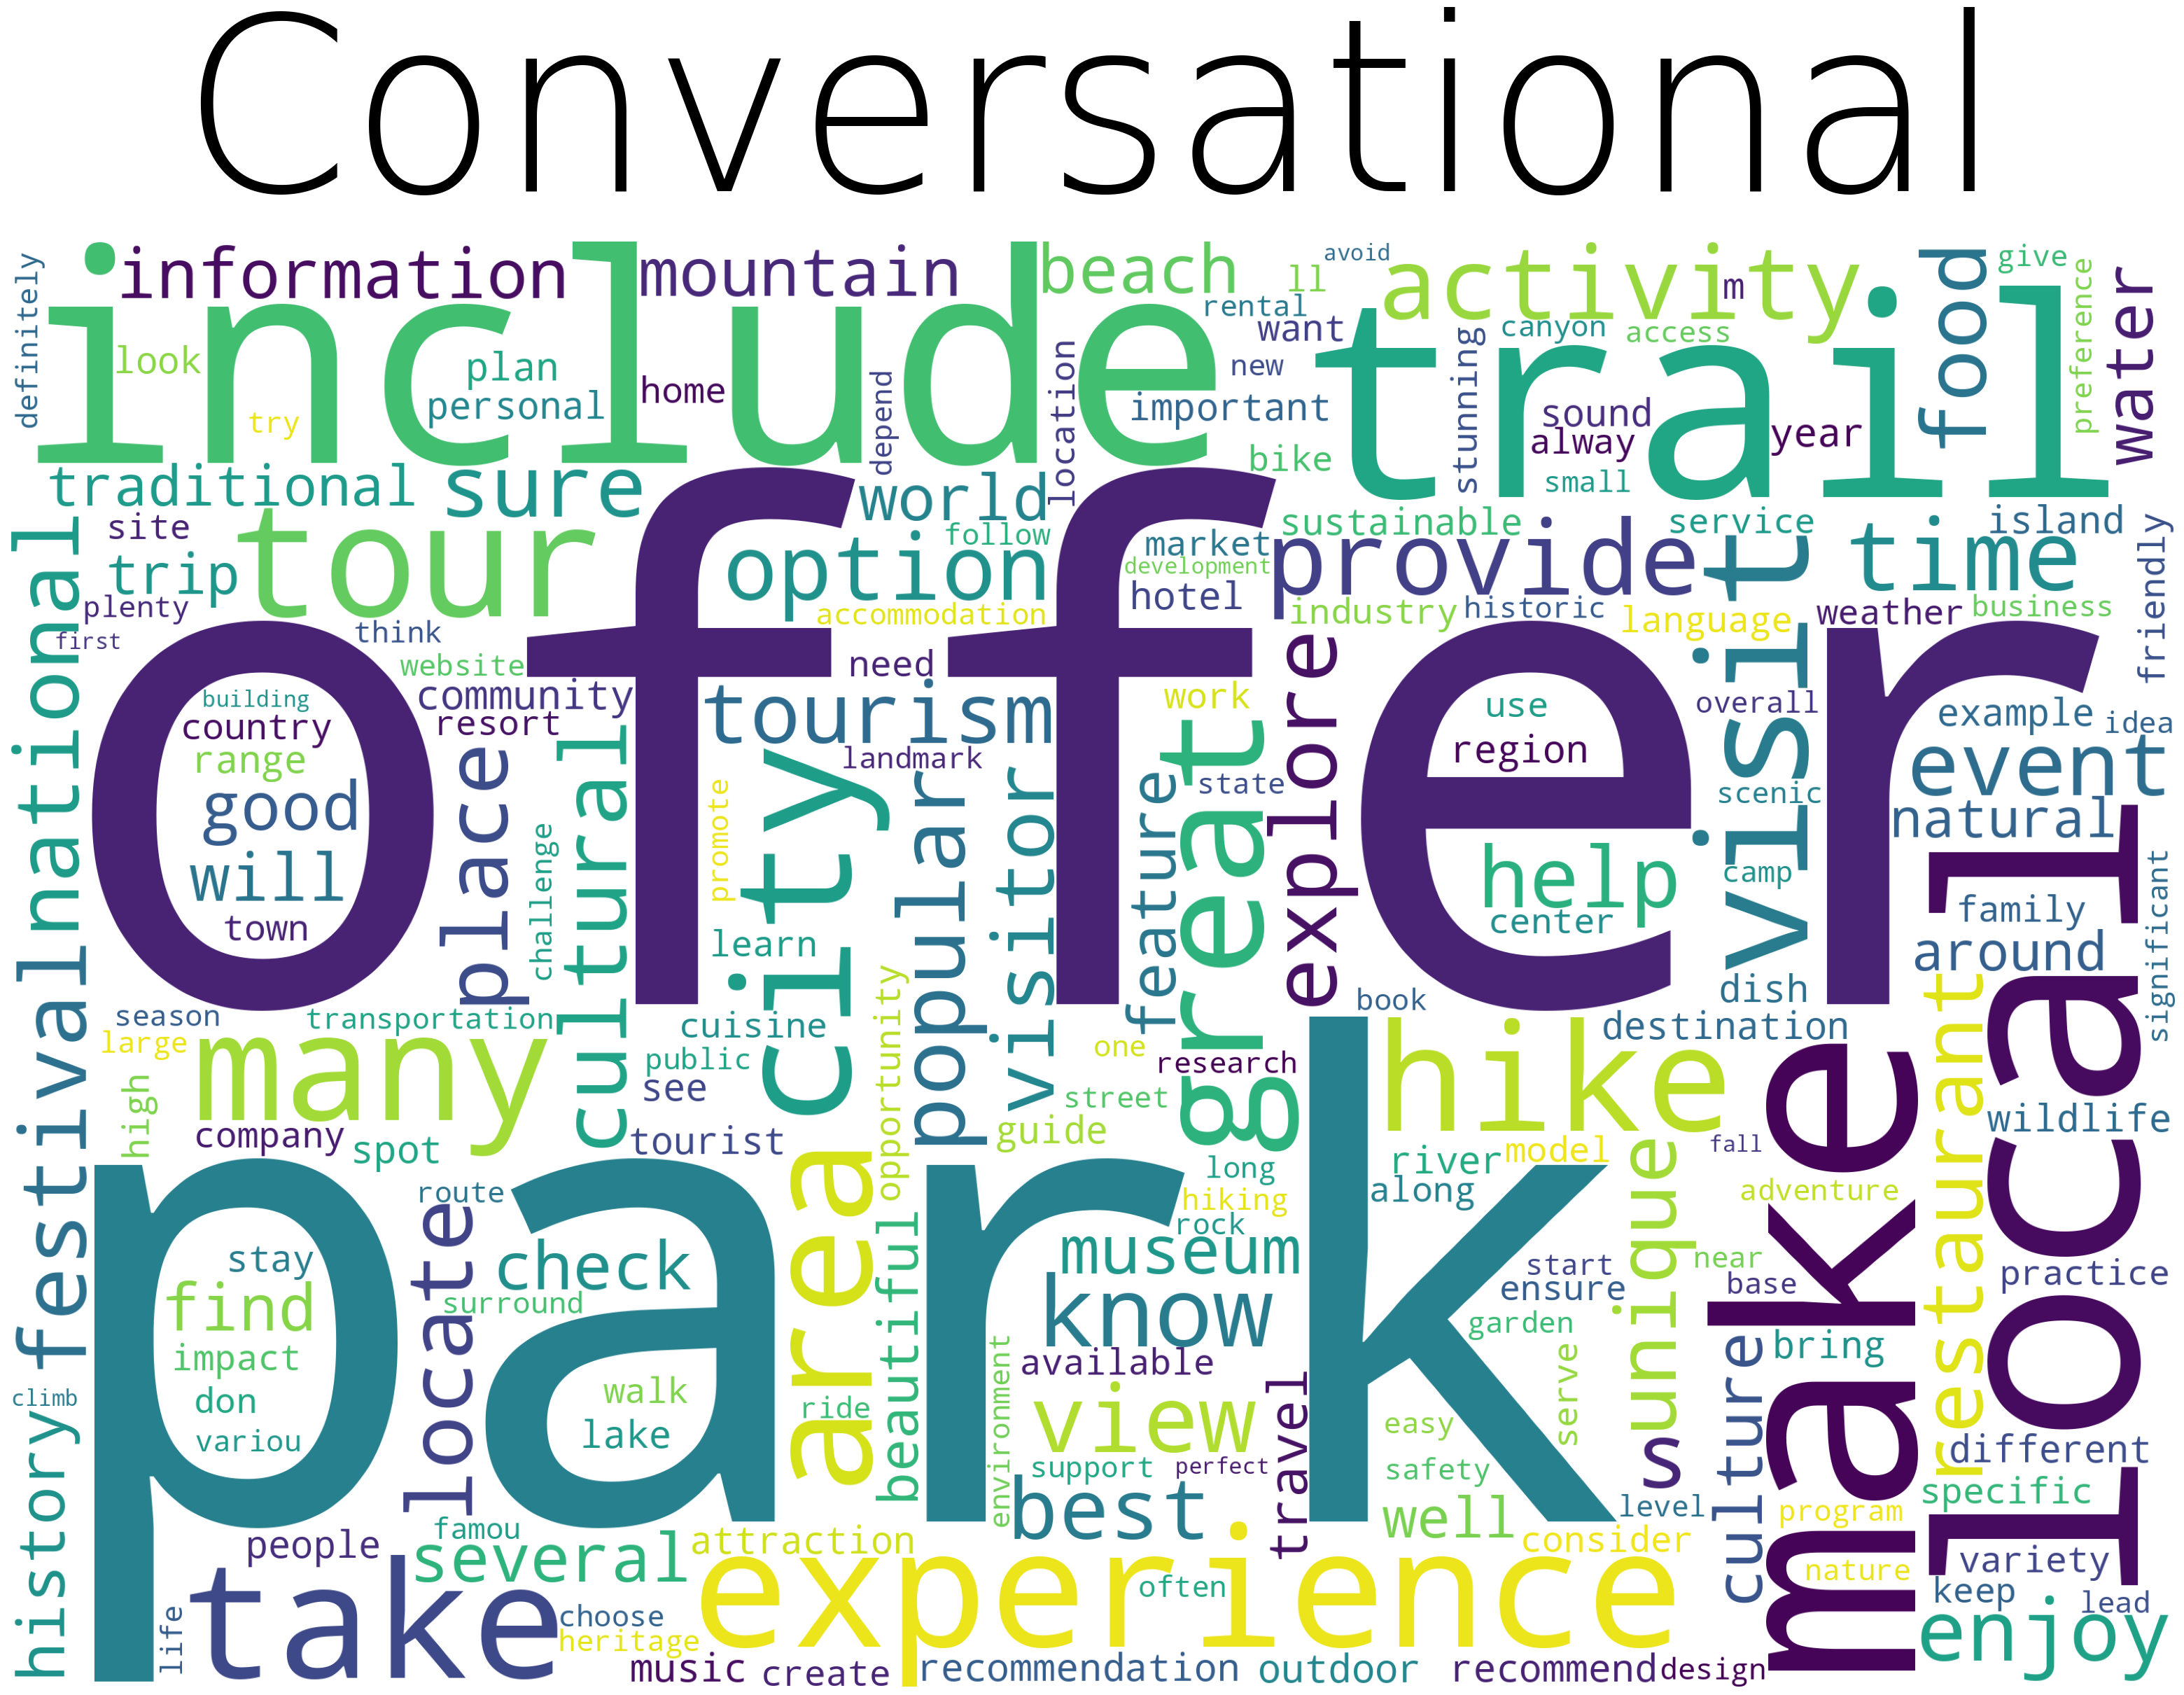

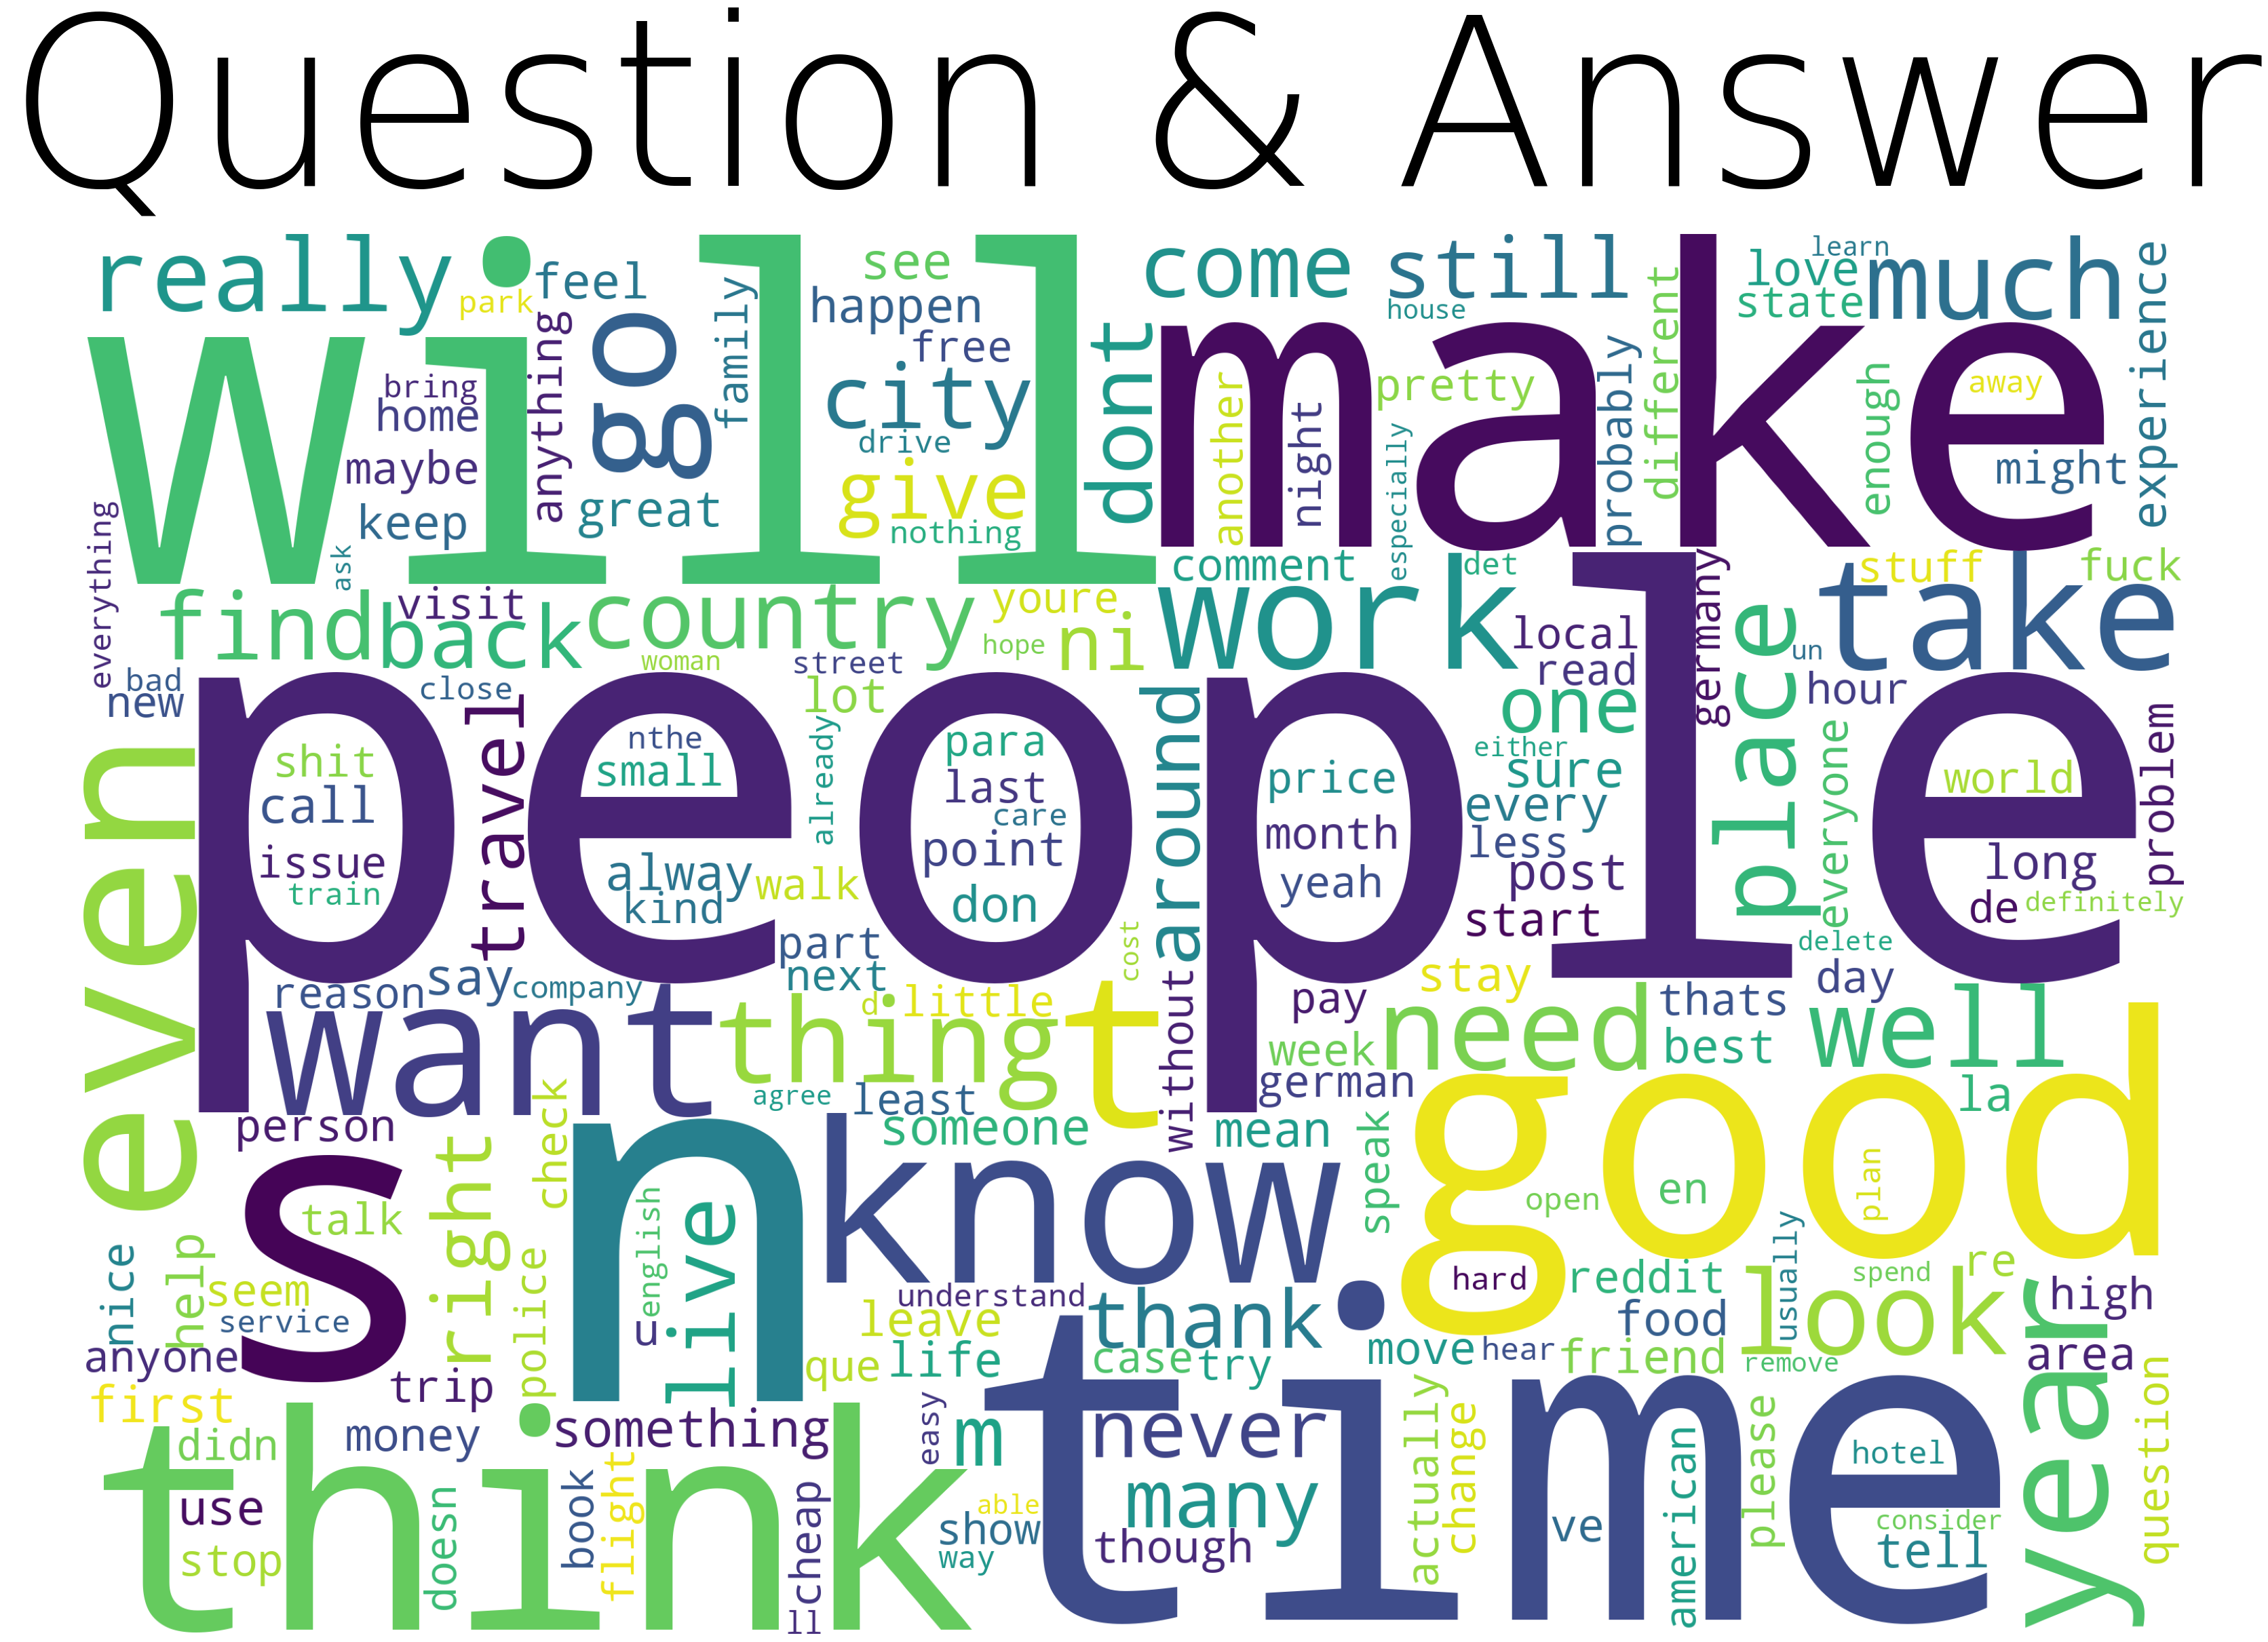

In [25]:
#create a word cloud for each news category and save as png
for title in title_list:
    text = categories_joined[title]
    # text = test
    
    # # Tokenize the text into words
    # words_list = nltk.word_tokenize(text)
    # sample = random.sample(words_list, 1000000)
    
    # # Filter out non-English words and single letters
    # filtered_words = []
    # for word in tqdm(sample, desc="Processing"):
    #     if word.lower() in words.words() and len(word) > 2:
    #         try:
    #             if detect(word) == "en":
    #                 filtered_words.append(word)
    #         except:
    #             pass
    # text = " ".join(filtered_words)
    
    # text = test
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False).generate(text)
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.title(title, fontdict = title_dic)
    plt.savefig(f'{output_dir}/{title}_word_cloud.png', bbox_inches='tight')
    plt.show()